# ARIMA 
Autoregressive Integrated Moving Average
- ARIMA(p,d,q)
  - p is the order of the autoregressive model
  - d is the degree of differencing
  - q is the order of the moving average model

ARIMA is defined as the sum of the AR(p) and MA(q) models with a degree of differencing d.

# AR vs. MA Models
- AR: A regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
- MA: A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

AR and MA models are both components of the ARIMA model, but they have different characteristics and uses.

AR (Autoregressive) models use past values of the time series to predict future values. The order of the AR model, denoted by p, specifies the number of past values to use in the prediction. An AR model of order p can be written as:

y_t = c + phi_1 * y_{t-1} + phi_2 * y_{t-2} + ... + phi_p * y_{t-p} + e_t

where y_t is the value of the time series at time t, c is a constant, phi_1 to phi_p are the coefficients of the past values, and e_t is the error term.

MA (Moving Average) models use past error terms to predict future values. The order of the MA model, denoted by q, specifies the number of past error terms to use in the prediction. An MA model of order q can be written as:

y_t = c + e_t + theta_1 * e_{t-1} + theta_2 * e_{t-2} + ... + theta_q * e_{t-q}

where y_t is the value of the time series at time t, c is a constant, e_t is the error term at time t, and theta_1 to theta_q are the coefficients of the past error terms.

In summary, AR models use past values of the time series to predict future values, while MA models use past error terms to predict future values. Both AR and MA models can be combined in the ARIMA model to capture the autocorrelation and seasonality of the time series.

C:\Users\adeel\AppData\Local\Temp\ipykernel_17748\3228390636.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
c:\Users\adeel\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


144    439.854371
145    465.295856
146    500.665679
147    535.971883
148    561.690766
149    571.315493
150    562.975621
151    539.732488
152    508.530532
153    478.148192
Name: predicted_mean, dtype: float64


<Axes: >

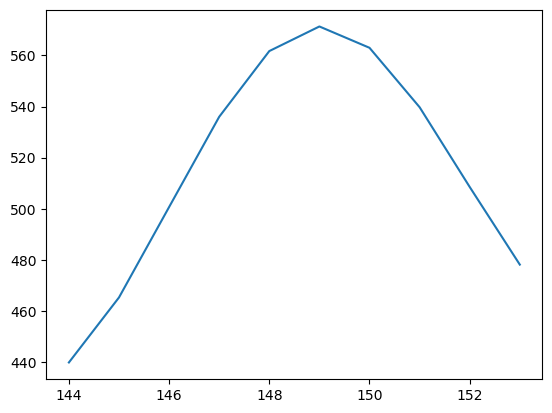

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load a sample dataset. We'll use the "AirPassengers" dataset.
df = pd.read_csv('D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\Data sets\AirPassengers.csv')

# We'll use the "Passengers" column to train our ARIMA model.
# For this example, we'll use an ARIMA(2, 1, 2) model.
model = ARIMA(df['#Passengers'], order=(2,1,2))

# Fit the model
model = model.fit()

# Make a prediction
prediction = model.forecast(steps=10)

print(prediction)

#plot the prediction
prediction.plot()

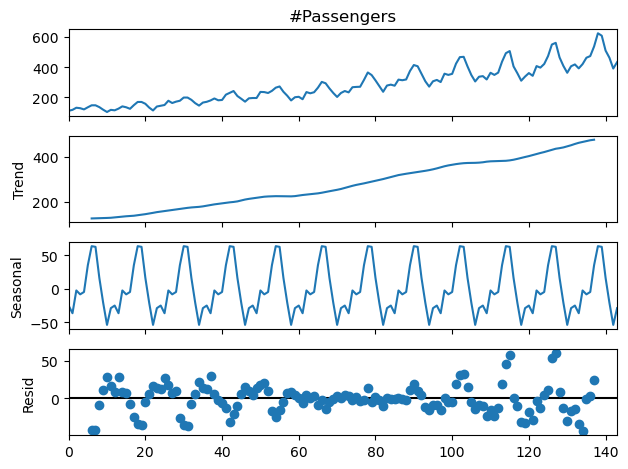

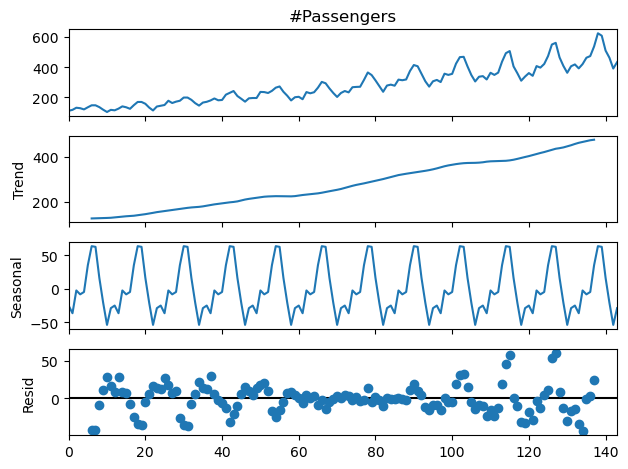

In [2]:
# decompose the time series into trend, seasonal and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['#Passengers'], model='additive', period=12)
decomposition.plot()

In [3]:
from statsmodels.tsa.stattools import adfuller # it is used to check the stationarity of the data
from numpy import log
result = adfuller(df['#Passengers'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print(" Is data Stationary ? ", result[1] < 0.05)


ADF Statistic: 0.815369
p-value: 0.991880
 Is data Stationary ?  False


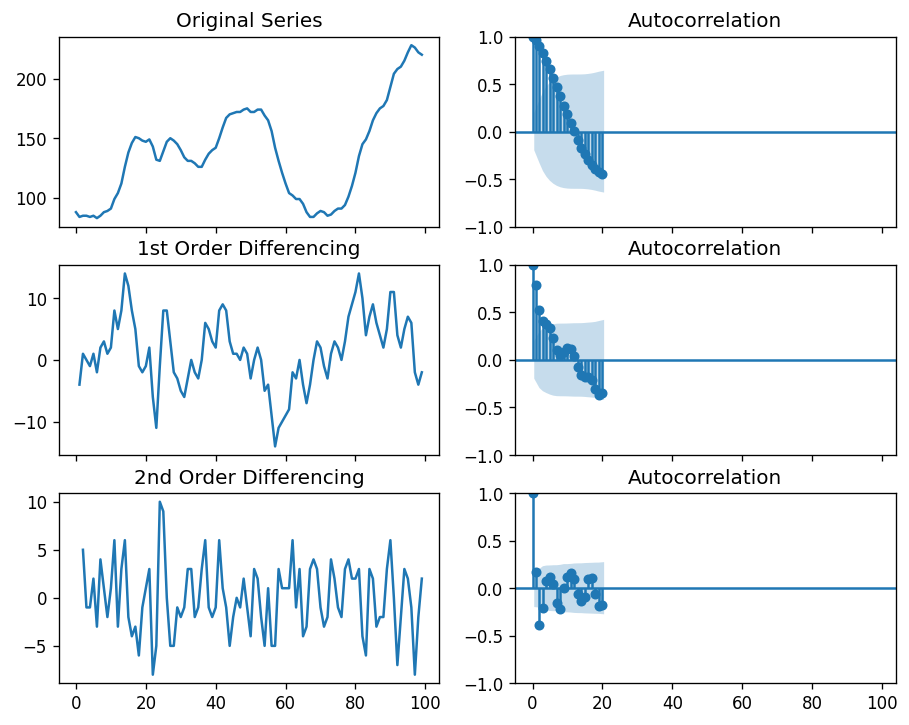

In [14]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [18]:
from pmdarima.arima.utils import ndiffs
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df.value

## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2



2

# Introduction to ARIMA Model

ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting model that is used to predict future values based on past observations. It is a combination of three components: AutoRegression (AR), Integration (I), and Moving Average (MA).

ARIMA models are widely used in various fields such as finance, economics, engineering, and science to forecast future values of a time series. In this notebook, we will learn how to implement ARIMA model in Python using the `pmdarima` library.

# Installing Required Libraries

Before we start, we need to install the required libraries. We will be using `pandas`, `numpy`, `matplotlib`, and `pmdarima` libraries in this notebook. You can install them using the following command:



In [ ]:
!pip install pandas numpy matplotlib pmdarima



# Importing Required Libraries

Once the libraries are installed, we can import them in our notebook using the following code:



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima.utils import ndiffs
from pmdarima.arima import auto_arima



# Loading Data

For this notebook, we will be using the `wwwusage.csv` dataset, which contains the number of users accessing a website over time. We can load the data using the following code:



In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
y = df.value
df.head()

,value
0,88
1,84
2,85
3,85
4,84




# Stationarity Test

Before we can apply ARIMA model to our data, we need to check if the data is stationary or not. Stationarity is an important assumption of ARIMA model, which means that the statistical properties of the time series remain constant over time.

We can check the stationarity of our data using the Augmented Dickey-Fuller (ADF) test, KPSS test, and Phillips-Perron (PP) test. The `ndiffs` function from `pmdarima` library can be used to determine the number of differences required to make the data stationary.



In [ ]:
## Adf Test
ndiffs(y, test='adf')  # 2

# KPSS test
ndiffs(y, test='kpss')  # 0

# PP test:
ndiffs(y, test='pp')  # 2



The output of the above code indicates that we need to take two differences to make the data stationary according to ADF and PP tests, and no difference is required according to KPSS test.

# Auto ARIMA Model

Once we have determined the number of differences required to make the data stationary, we can apply the ARIMA model to our data. The `auto_arima` function from `pmdarima` library can be used to automatically select the best ARIMA model based on the AIC (Akaike Information Criterion) value.



In [24]:
model = auto_arima(y, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=496.268, Time=0.06 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=515.970, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=513.581, Time=0.04 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=488.108, Time=0.06 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=510.539, Time=0.01 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=inf, Time=1.31 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=506.329, Time=0.04 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=487.851, Time=0.08 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=509.857, Time=0.03 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,2,1)(0,1,2)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=505.849, Time=0.05 sec
 ARIMA(1,2,1)(1,1,2)[12]             : AIC=inf, Time=



The above code fits an ARIMA model to our data using the `auto_arima` function. The `start_p`, `start_q`, `max_p`, and `max_q` parameters define the range of AR and MA terms to consider. The `m` parameter defines the number of observations per season. The `start_P` parameter defines the range of seasonal AR terms to consider. The `d` and `D` parameters define the number of non-seasonal and seasonal differences, respectively. The `trace` parameter prints the progress of the model fitting process. The `error_action` parameter defines the action to take if an error occurs during the model fitting process. The `suppress_warnings` parameter suppresses the warnings during the model fitting process. The `stepwise` parameter performs a stepwise search for the best model.

# Model Summary

Once the model is fitted, we can print the summary of the model using the `summary` method.



In [25]:
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  100
Model:             SARIMAX(2, 2, 0)x(0, 1, [1], 12)   Log Likelihood                -234.012
Date:                              Thu, 22 Jun 2023   AIC                            476.025
Time:                                      16:00:12   BIC                            485.842
Sample:                                           0   HQIC                           479.976
                                              - 100                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2603      0.103      2.537      0.011       0.059       0.461
ar.L2         -0.47



The output of the above code will display the summary of the ARIMA model, which includes the coefficients, standard errors, t-values, and p-values of the model.

# Forecasting

Once the model is fitted, we can use it to forecast future values of the time series. The `predict` method can be used to generate the forecasts.



In [26]:
forecast = model.predict(n_periods=12)



The above code generates 12 future values of the time series.

# Plotting Results

Finally, we can plot the original time series, the fitted values, and the forecasts using the following code:



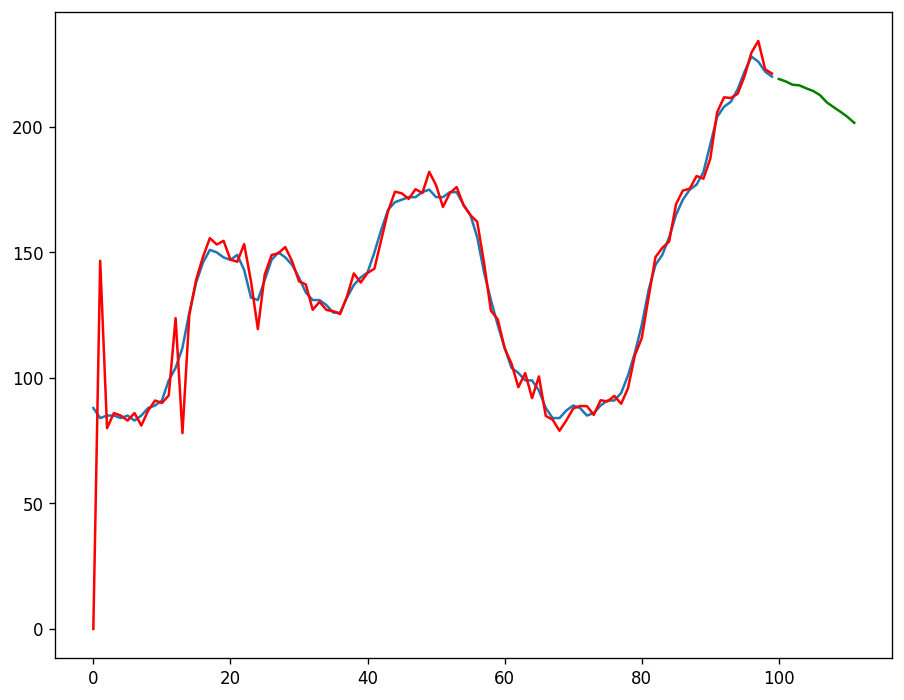

In [27]:
plt.plot(y)
plt.plot(model.predict_in_sample(), color='red')
plt.plot(forecast, color='green')
plt.show()



The above code will display a plot of the original time series, the fitted values, and the forecasts.

# Conclusion

In this notebook, we learned how to implement ARIMA model in Python using the `pmdarima` library. We loaded the data, checked the stationarity of the data, fitted the ARIMA model, generated the forecasts, and plotted the results. ARIMA model is a powerful tool for time series forecasting and can be used in various fields to predict future values of a time series.

# Model Evaluation

There are several ways to evaluate the performance of an ARIMA model. Here are some common methods:

1. Mean Absolute Error (MAE): This measures the average absolute difference between the actual and predicted values. A lower MAE indicates better performance.

2. Mean Squared Error (MSE): This measures the average squared difference between the actual and predicted values. A lower MSE indicates better performance.

3. Root Mean Squared Error (RMSE): This measures the square root of the average squared difference between the actual and predicted values. A lower RMSE indicates better performance.

4. Mean Absolute Percentage Error (MAPE): This measures the average percentage difference between the actual and predicted values. A lower MAPE indicates better performance.

5. Symmetric Mean Absolute Percentage Error (SMAPE): This measures the average percentage difference between the actual and predicted values, but it is symmetric around zero. A lower SMAPE indicates better performance.

You can use these metrics to evaluate the performance of your ARIMA model. You can calculate these metrics using the actual and predicted values of the time series. Here's an example code to calculate these metrics:



In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y, model.predict_in_sample())
print('MAE:', mae)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, model.predict_in_sample())
print('MSE:', mse)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y - model.predict_in_sample()) / y)) * 100
print('MAPE:', mape)

# Calculate the symmetric mean absolute percentage error (SMAPE)
smape = np.mean(2.0 * np.abs(model.predict_in_sample() - y) / (np.abs(y) + np.abs(model.predict_in_sample()))) * 100
print('SMAPE:', smape)

MAE: 4.822137079069951
MSE: 145.1767250361859
RMSE: 12.0489304519607
MAPE: 4.406139445436814
SMAPE: 5.248885226163398




This code calculates the MAE, MSE, RMSE, MAPE, and SMAPE metrics for the ARIMA model. You can use these metrics to compare the performance of different ARIMA models or to evaluate the performance of your model over time.

# ARIMA vs SARIMA

ARIMA (Autoregressive Integrated Moving Average) and SARIMA (Seasonal Autoregressive Integrated Moving Average) models are both time series models that are used to forecast future values of a time series based on its past values. The main difference between the two models is that SARIMA models are designed to handle time series data with seasonal patterns, while ARIMA models are designed for non-seasonal time series data.

ARIMA models are based on three parameters: p, d, and q. The p parameter represents the number of autoregressive terms, the d parameter represents the number of differences needed to make the time series stationary, and the q parameter represents the number of moving average terms. ARIMA models are used to model non-seasonal time series data.

SARIMA models are based on six parameters: p, d, q, P, D, and Q. The additional three parameters (P, D, and Q) represent the seasonal autoregressive, seasonal difference, and seasonal moving average terms, respectively. SARIMA models are used to model time series data with seasonal patterns.

In summary, ARIMA models are used for non-seasonal time series data, while SARIMA models are used for time series data with seasonal patterns. SARIMA models are an extension of ARIMA models that include additional parameters to handle seasonal patterns in the data.

## Introduction to SARIMA

SARIMA (Seasonal Autoregressive Integrated Moving Average) is a time series model that is used to forecast future values of a time series based on its past values. SARIMA is an extension of ARIMA (Autoregressive Integrated Moving Average) that includes additional parameters to handle seasonal patterns in the data.

SARIMA models are based on six parameters: p, d, q, P, D, and Q. The p parameter represents the number of autoregressive terms, the d parameter represents the number of differences needed to make the time series stationary, and the q parameter represents the number of moving average terms. The additional three parameters (P, D, and Q) represent the seasonal autoregressive, seasonal difference, and seasonal moving average terms, respectively.

## How SARIMA works

SARIMA works by modeling the time series data as a combination of autoregressive, moving average, and seasonal components. The autoregressive component models the relationship between the current value of the time series and its past values. The moving average component models the relationship between the current value of the time series and its past errors. The seasonal component models the relationship between the current value of the time series and its past seasonal values.

SARIMA models are typically fitted to the time series data using the maximum likelihood estimation method. The fitted model can then be used to make predictions on new data.

## Implementing SARIMA in Python

SARIMA can be implemented in Python using the `statsmodels` library. Here's an example code that demonstrates how to implement SARIMA in Python:



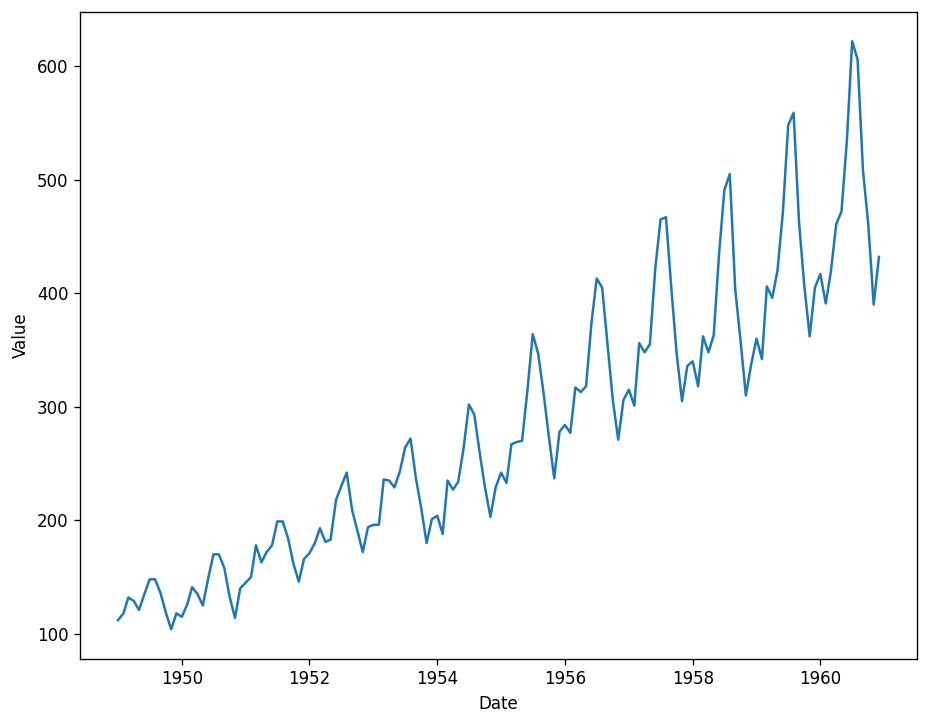

/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


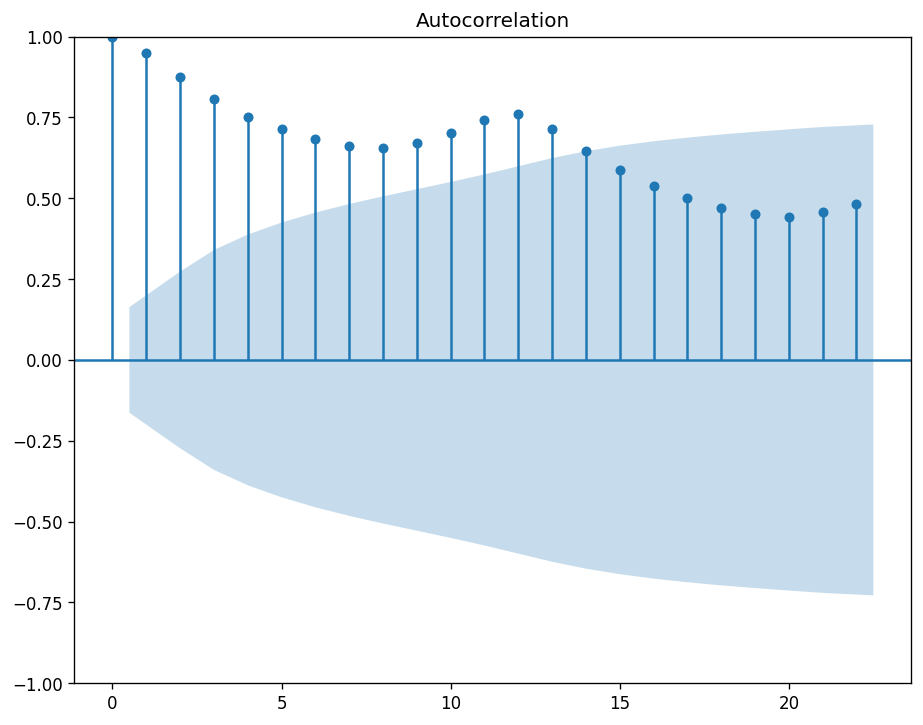

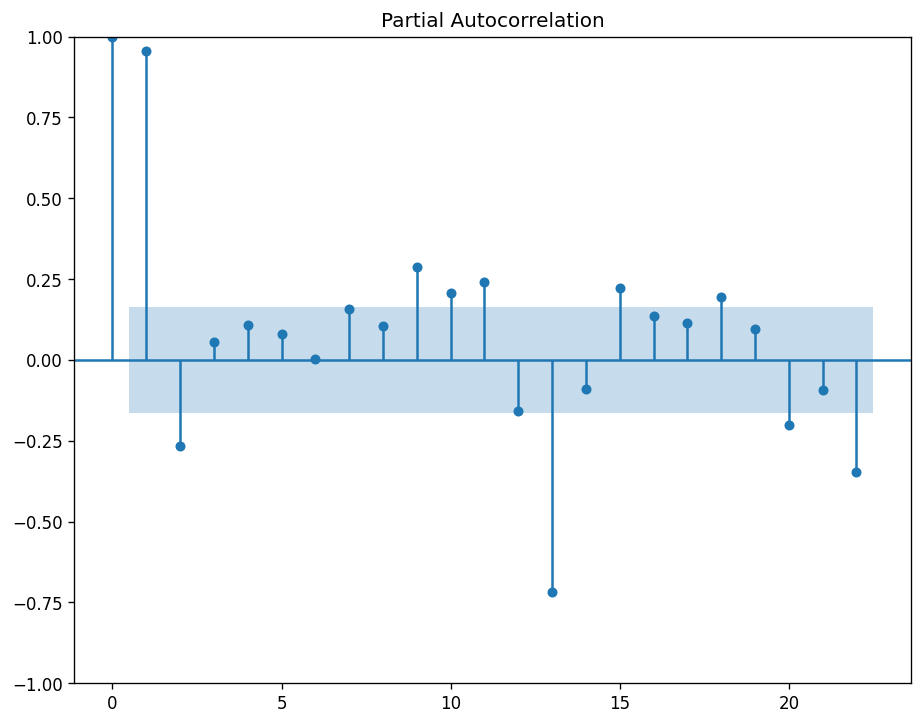

/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/babaaammar/mambaforge/envs/python_ml/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.52844D+00    |proj g|=  8.65844D-02

At iterate    5    f=  3.52337D+00    |proj g|=  3.73532D-02

At iterate   10    f=  3.51577D+00    |proj g|=  4.96151D-03

At iterate   15    f=  3.51498D+00    |proj g|=  1.97530D-03

At iterate   20    f=  3.51493D+00    |proj g|=  7.02490D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   3.310D-05   3.515D+00
  F =   3.5149263641200741     

CONVERG

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the time series data
df = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)

# Plot the time series data
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Plot the autocorrelation and partial autocorrelation functions
plot_acf(df)
plot_pacf(df)
plt.show()

# Define the SARIMA model parameters
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
m = 12

# Fit the SARIMA model to the data
model = SARIMAX(df, order=(p, d, q), seasonal_order=(P, D, Q, m))
results = model.fit()

# Print the model summary
print(results.summary())

# Make predictions on new data
forecast = results.forecast(steps=12)
print(forecast)



In this code, we first load the time series data from a CSV file and plot it. We then plot the autocorrelation and partial autocorrelation functions to determine the values of the p, d, and q parameters.

We then define the SARIMA model parameters and fit the model to the data using the `SARIMAX` class. We print the model summary to see the values of the estimated parameters. Finally, we make predictions on new data using the `forecast` method.

## Conclusion

SARIMA is a powerful time series model that can be used to forecast future values of a time series based on its past values. SARIMA models are an extension of ARIMA models that include additional parameters to handle seasonal patterns in the data. SARIMA can be implemented in Python using the `statsmodels` library.